# PCL-Python 기반 Normal Estimation

In [8]:
import pcl

def get_normals(cloud_path):
    """
    The actual *compute* call from the NormalEstimation class does nothing internally but:
    for each point p in cloud P
        1. get the nearest neighbors of p
        2. compute the surface normal n of p
        3. check if n is consistently oriented towards the viewpoint and flip otherwise

    # normals: pcl._pcl.PointCloud_Normal,size: 26475
    # cloud: pcl._pcl.PointCloud
    """
    cloud = pcl.load(cloud_path)
    
    feature = cloud.make_NormalEstimation()
    #feature.set_RadiusSearch(0.1) #Use all neighbors in a sphere of radius 3cm
    
    feature.set_KSearch(3)
    normals = feature.compute()
    
    return normals

In [9]:
normals=get_normals('tabletop.pcd')

In [10]:
for i in range(0, 5):#range(0, normals.size):
    print ('normal_x: ' + str(normals[i][0]) + ', normal_y : ' + str(normals[i][1]) + ', normal_z : ' + str(normals[i][2]))

normal_x: 0.19359613955, normal_y : 0.742476344109, normal_z : 0.641287267208
normal_x: 0.19359613955, normal_y : 0.742476344109, normal_z : 0.641287267208
normal_x: 0.0, normal_y : 0.327951073647, normal_z : -0.944694817066
normal_x: -0.0556097365916, normal_y : -0.298579514027, normal_z : -0.952763259411
normal_x: -0.0264745149761, normal_y : -0.464837819338, normal_z : -0.884999930859


In [11]:
import numpy as np

def compute_normal_histograms(normal_cloud, nbins=32, nrange=(-1,1)):
    '''
    Computes and bins the point-cloud data using the objects distribution of surface normals.
    :param: normal_cloud, point cloud containing the filtered clusters.
    :param: nbins,number of bins that data will be pooled into.
    :param: nrange, value range of the data to be pooled.
    :return: the normalised histogram of surface normals
    '''
    norm_x_vals = []
    norm_y_vals = []
    norm_z_vals = []

    for I in range(0,normal_cloud.size):
        norm_x_vals.append(normal_cloud[I][0])
        norm_y_vals.append(normal_cloud[I][1])
        norm_z_vals.append(normal_cloud[I][2])

    # Compute histograms of normal values (just like with color)
    norm_x_hist = np.histogram(norm_x_vals, bins=nbins, range=nrange)
    norm_y_hist = np.histogram(norm_y_vals, bins=nbins, range=nrange)
    norm_z_hist = np.histogram(norm_z_vals, bins=nbins, range=nrange) 

    # Concatenate and normalize the histograms
    hist_features = np.concatenate((norm_x_hist[0], norm_y_hist[0], norm_z_hist[0])).astype(np.float64)
    normed_features = hist_features / np.sum(hist_features)

    return normed_features

In [12]:
normed_features=compute_normal_histograms(normals)

In [13]:
import matplotlib.pyplot as plt

def plot_normals(normed_features,nbins):
    plt.hist(normed_features, nbins)
    plt.xlabel('Weight (kg)', fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()

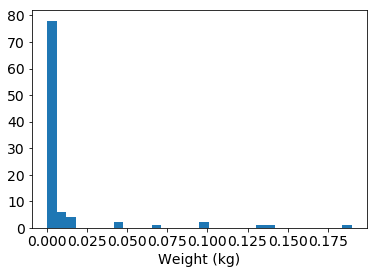

In [14]:
plot_normals(normed_features,32)